In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from operator import pow, ipow

import toolz as fp

In [2]:
%load_ext autoreload
%autoreload 2

## Exercise 1

**Purpose: Iterative application of Bayes’ rule, and seeing how posterior probabilities change with inclusion of more data.**

This exercise extends the ideas of Table 5.4, so at this time, please review Table 5.4 and its discussion in the text. Suppose that the same randomly selected person as in Table 5.4 gets re-tested after the first test result was positive, and on the re-test, the result is negative. When taking into account the results of both tests, what is the probability that the person has the disease? Hint: For the prior probability of the re-test, use the posterior computed from the Table 5.4. Retain as many decimal places as possible, as rounding can have a surprisingly big effect on the results. One way to avoid unnecessary rounding is to do the calculations in R (or python in this case).

In [3]:
p_disease = 0.001
p_no_disease = 1 - p_disease

p_positive_given_disease = 0.99
p_negative_given_disease = 1 - p_positive_given_disease
p_positive_given_no_disease = 0.05
p_negative_given_no_disease = 1 - p_positive_given_no_disease

p_disease_given_positive = (p_disease * p_positive_given_disease) / (p_positive_given_disease * p_disease + p_positive_given_no_disease * p_no_disease) 

In [4]:
p_disease_given_positive

0.019434628975265017

In [5]:
new_p_disease = p_disease_given_positive
new_p_no_disease = 1 - p_disease_given_positive

In [6]:
evidence = (p_negative_given_disease * new_p_disease) + (p_negative_given_no_disease * new_p_no_disease)
p_disease_given_positive_and_negative = (new_p_disease * p_negative_given_disease) / evidence

In [7]:
p_disease_given_positive_and_negative

0.00020858616504854387

## Exercise 2
**Purpose: Getting an intuition for the previous results by using “natural frequency” and “Markov” representations**

**(A)** Suppose that the population consists of 100,000 people. Compute how many people would be expected to fall into each cell of Table 5.4. To compute the expected frequency of people in a cell, just multiply the cell probability by the size of the population. To get you started, a few of the cells of the frequency table are filled in here. Notice the frequencies on the lower margin of the table. They indicate that out of 100,000 people, only 100 have the disease, while 99,900 do not have the disease. These marginal frequencies instantiate the prior probability that p(θ = ⌢ ̈ ) = 0.001. Notice also the cell frequencies in the column θ = ⌢ ̈ , which indicate that of 100 people with the disease, 99 have a positive test result and 1 has a negative test result. These cell frequencies instantiate the hit rate of 0.99. Your job for this part of the exercise is to fill in the frequencies of the remaining cells of the table.

In [8]:
p_positive_joint_disease = p_positive_given_disease * p_disease
p_negative_joint_disease = p_negative_given_disease * p_disease

p_positive_joint_no_disease = p_positive_given_no_disease * p_no_disease
p_negative_joint_no_disease = p_negative_given_no_disease * p_no_disease

p_positive = p_positive_joint_disease + p_positive_joint_no_disease
p_negative = p_negative_joint_disease + p_negative_joint_no_disease

In [9]:
p_diagnostic_joint_condition = pd.DataFrame({
    "disease": [p_positive_joint_disease, p_negative_joint_disease, p_disease],
    "no_disease": [p_positive_joint_no_disease, p_negative_joint_no_disease, p_no_disease],
    "marginal_diagnostics": [p_positive, p_negative, 1]
}, index=["positive_diagnostic", "negative_diagnostic", "marginal_disease"])

p_diagnostic_joint_condition * 100_000

,disease,no_disease,marginal_diagnostics
positive_diagnostic,99.0,4995.0,5094.0
negative_diagnostic,1.0,94905.0,94906.0
marginal_disease,100.0,99900.0,100000.0


**(B)** Take a good look at the frequencies in the table you just computed for the previous part. These are the so-called “natural frequencies” of the events, as opposed to the somewhat unintuitive expression in terms of conditional probabilities (Gigerenzer & Hoffrage, 1995). From the cell frequencies alone, determine the proportion of people who have the disease, given that their test result is positive. Before computing the exact answer arithmetically, first give a rough intuitive answer merely by looking at the relative frequencies in the row D = +. Does your intuitive answer match the intuitive answer you provided when originally reading about Table 5.4? Probably not. Your intuitive answer here is probably much closer to the correct answer. Now compute the exact answer arithmetically. It should match the result from applying Bayes’ rule in Table 5.4.

In [10]:
p_disease_given_positive = p_positive_joint_disease / p_positive

print("{:.8f}".format(p_disease_given_positive))


0.01943463


**(C)** Now we’ll consider a related representation of the probabilities in terms of natural frequencies, which is especially useful when we accumulate more data. This type of representation is called a “Markov” representation by Krauss, Martignon, and Hoffrage (1999). Suppose now we start with a population of N = 10, 000, 000 people. We expect 99.9% of them (i.e., 9,990,000) not to have the disease, and just 0.1% (i.e., 10,000) to have the disease. Now consider how many people we expect to test positive. Of the 10,000 people who have the disease, 99%, (i.e., 9,900) will be expected to test positive. Of the 9,990,000 people who do not have the disease, 5% (i.e., 499,500) will be expected to test positive. Now consider re-testing everyone who has tested positive on the first test. How many of them are expected to show a negative result on the retest? Use this diagram to compute your answer:

![](img/ch5_markov.png)

When computing the frequencies for the empty boxes above, be careful to use the proper conditional probabilities!

In [11]:
root = 10_000_000

left_branch_one = p_disease * root
left_branch_two = p_positive_given_disease * left_branch_one
left_branch_three = p_negative_given_disease  * left_branch_two

right_branch_one = p_no_disease * root
right_branch_two = p_positive_given_no_disease * right_branch_one
right_branch_three = p_negative_given_no_disease * right_branch_two

print(f"       {int(root):,}")
print(f"{int(left_branch_one):,}     |     {int(right_branch_one):,}")
print(f"{int(left_branch_two):,}      |     {int(right_branch_two):,}")
print(f"{int(left_branch_three):,}         |     {int(right_branch_three):,}")

       10,000,000
10,000     |     9,990,000
9,900      |     499,500
99         |     474,525


**(D)** Use the diagram in the previous part to answer this: What proportion of people, who test positive at first and then negative on retest, actually have the disease? In other words, of the total number of people at the bottom of the diagram in the previous part (those are the people who tested positive then negative), what proportion of them are in the left branch of the tree? *How does the result compare with your answer to Exercise 5.1*?

In [12]:
d_answer = left_branch_three / (left_branch_three + right_branch_three)
print(d_answer)

0.00020858616504854387


## Exercise 3

**Purpose: To see a hands-on example of data-order invariance.**

Consider again the disease and diagnostic test of the previous two exercises.

**(A)** Suppose that a person selected at random from the population gets the test and it comes back negative. Compute the probability that the person has the disease.

In [13]:
p_disease_given_negative = p_negative_joint_disease / p_negative

new_p_disease = p_disease_given_negative
print("{:.10f}".format(new_p_disease))

0.0000105367


**(B)** The person then gets re-tested, and on the second test the result is positive. Compute the probability that the person has the disease. *How does the result compare with your answer to Exercise 5.1*?

In [14]:
new_new_p_disease = (p_positive_given_disease * new_p_disease) / (p_positive_given_disease * new_p_disease + p_positive_given_no_disease * (1 - new_p_disease))

print(f"{new_new_p_disease:.10f}")

0.0002085862


## Exercise 4 

**Purpose: To gain intuition about Bayesian updating by using BernGrid.**

Open the program `BernGridExample.R`. You will notice there are several examples of using the function `BernGrid`. Run the script. For each example, include the R code and the resulting graphic and explain what idea the example illustrates. Hints: Look back at Figures 5.2 and 5.3, and look ahead to Figure 6.5. Two of the examples involve a single flip, with the only difference between the examples being whether the prior is uniform or contains only two extreme options. The point of those two examples is to show that a single datum implies little when the prior is vague, but a single datum can have strong implications when the prior allows only two very different possibilities.

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70
mpl.rcParams['figure.figsize'] = (6, 6)

import numpy as np
from helpers.bern_grid import plot_bern_grid

In [16]:
def normalize(array: np.ndarray) -> np.ndarray:
    return array / array.sum()

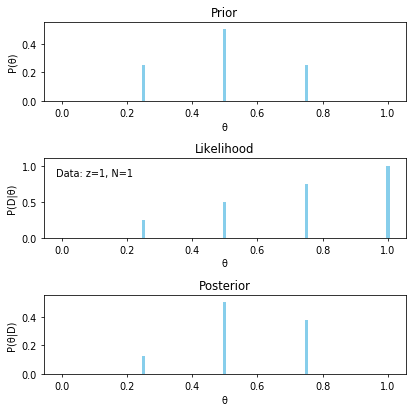

In [17]:
theta = np.linspace(0, 1, 5)            # Sparse teeth for Theta.
p_theta = np.minimum(theta, 1 - theta)  # Triangular shape for pTheta.
p_theta = normalize(p_theta)            # Make pTheta sum to 1.0
data = np.array([1])                    # Single flip with 1 head

plot_bern_grid(theta, p_theta, data)

# This just shows reallocation of credibility for a small number of candidate parameter values and a single datum.

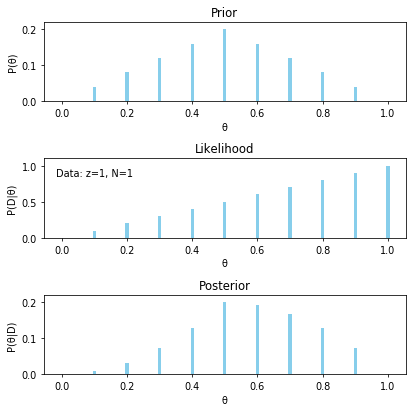

In [18]:
theta = np.linspace(0, 1, 11)           # Sparse teeth for Theta.
p_theta = np.minimum(theta, 1 - theta)  # Triangular shape for pTheta.
p_theta = normalize(p_theta)            # Make pTheta sum to 1.0
data = np.array([1])                    # Single flip with 1 head

plot_bern_grid(theta, p_theta, data)

# Ditto previous example.

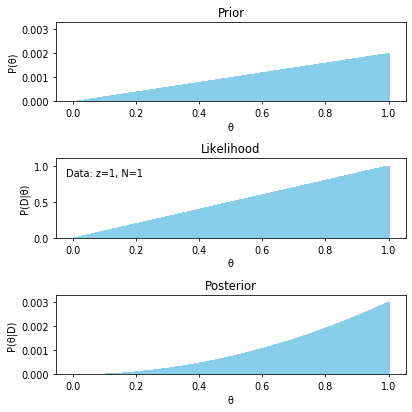

In [19]:
theta = np.linspace(0, 1, 1001)         # Fine teeth for Theta.
p_theta = np.arange(0, len(theta))      # Uniform (horizontal) shape for pTheta.
p_theta = normalize(p_theta)            # Make pTheta sum to 1.0
data = np.array([1])                    # Single flip with 1 head

plot_bern_grid(theta, p_theta, data)

# Posterior looks like likelihood when prior is uniform; also builds intuition about what the Bernoulli likelihood function looks like.

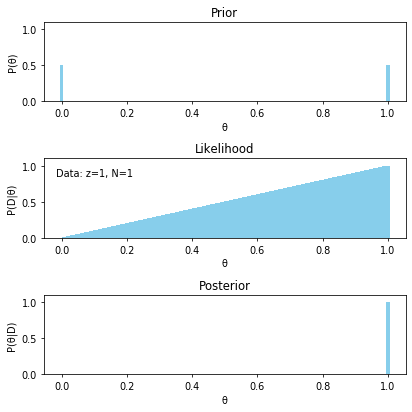

In [20]:
theta = np.linspace(0, 1, 1001)         # Fine teeth for Theta.
p_theta = np.array([0] * len(theta))    # Only extremes are possible!
p_theta[[0, -1]] = 1                    # Only extremes are possible!
p_theta = normalize(p_theta)            # Make pTheta sum to 1.0
data = np.array([1])                    # Single flip with 1 head

plot_bern_grid(theta, p_theta, data)

# This example is interesting because the prior allows only two possible parameter values. (The floor between extremes has zero height!) Then a single flip of the coin shifts all probability to one candidate parameter value.

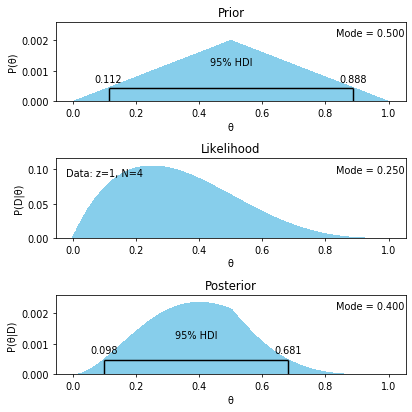

In [21]:
theta = np.linspace(0, 1, 1001)         # Fine teeth for Theta.
p_theta = np.minimum(theta, 1 - theta)  # Triangular shape for p_theta
p_theta = normalize(p_theta)            # Make pTheta sum to 1.0
data = np.array([0, 0, 0, 1])           # 25% heads, N=4

plot_bern_grid(theta, p_theta, data, show_central_tendency="mode", show_hdi=True)

# Shows that a small data set only shifts beliefs a little; the prior retains noticeable influence on the posterior.

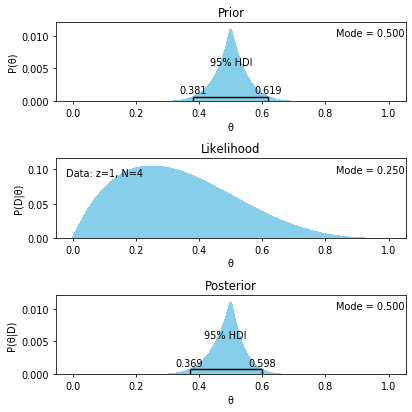

In [22]:
theta = np.linspace(0, 1, 1001)           # Fine teeth for Theta.
p_theta = fp.pipe(theta,
    lambda x: np.minimum(x, 1 - theta),   # Triangular shape for pTheta.
    normalize,                            # Make pTheta sum to 1.0
    lambda x: x ** 10,                    # Sharpen pTheta 
    normalize,                            # Make pTheta sum to 1.0
)                 
data = np.array([0, 0, 0, 1])             # 25% heads, N=4
plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)

# A small data set with a strong prior: The prior dominates the posterior.

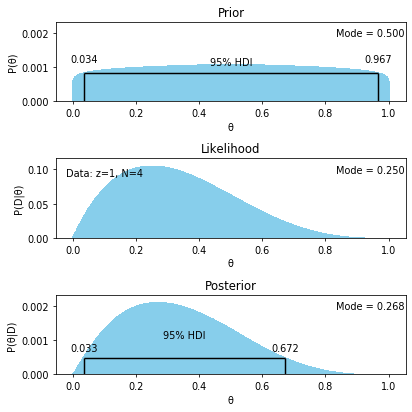

In [23]:
theta = np.linspace(0, 1, 1001)           # Fine teeth for Theta.
p_theta = fp.pipe(theta,
    lambda x: np.minimum(x, 1 - x),       # Triangular shape for pTheta.
    normalize,                  # Make pTheta sum to 1.0
    lambda x: x ** 0.1,                   # Flatten pTheta !
    normalize,                  # Make pTheta sum to 1.0
)
data = np.array([0, 0, 0, 1])             # 25% heads, N=4

plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)
# A small data set with a vague prior: The data dominate the posterior.

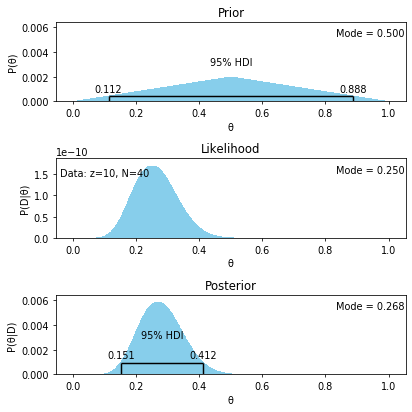

In [24]:
theta = np.linspace(0, 1, 1001)           # Fine teeth for Theta.
p_theta = fp.pipe(theta,
    lambda x: np.minimum(x, 1 - x),   # Triangular shape for pTheta.
    normalize,                # Make pTheta sum to 1.0
)
data = np.array([0] * 30 + [1] * 10)
plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)

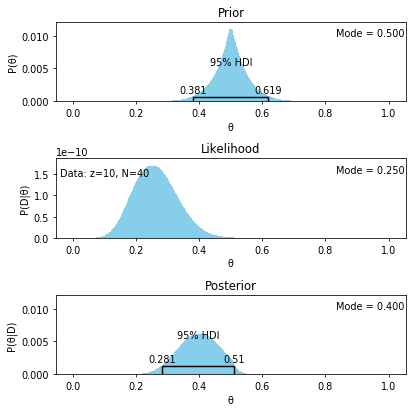

In [25]:
theta = np.linspace(0, 1, 1001) # Fine teeth for Theta
p_theta = fp.pipe(theta,
    lambda x: np.minimum(x, 1 - x),   # Triangular shape for pTheta.
    normalize,                        # Make pTheta sumto 1.0
    lambda x: x ** 10,                # Sharpen pTheta !
    normalize,                        # Make pTheta sum to 1.0
)
data = np.array([0] * 30 + [1] * 10)  # 25% heads, N=40
plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)

# A modest amount of data is not enough to overwhelm a strong prior. The posterior is a compromise between prior and data. This is appropriate, because the prior must have beeninformed by previous data/knowledge, so should not be abandoned easily.

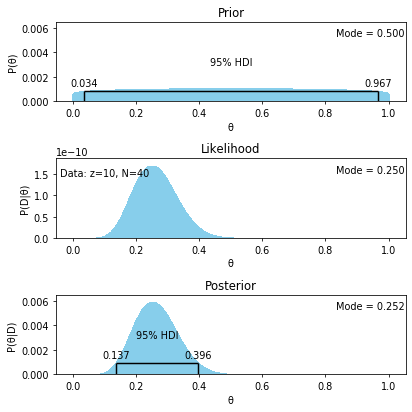

In [26]:
theta = np.linspace(0, 1, 1001)       # Fine teeth for Theta.
p_theta = fp.pipe(theta,
    lambda x: np.minimum(x, 1 - x),   # Triangular shape for pTheta.
    normalize,                        # Make pTheta sum to 1.0
    lambda x: x ** 0.1,               # Flatten pTheta !
    normalize,                        # Make pTheta sum to 1.0
)
data = np.array([0] * 30 + [1] * 10)  # 25% heads, N=40
plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)

# Vague prior has little influence on posterior.

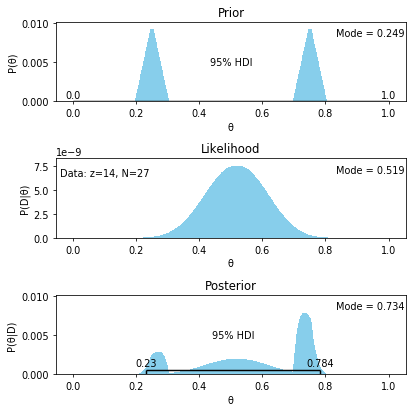

In [27]:
theta = np.linspace(0, 1, 1000)       # Fine teeth for Theta.
# Two triangular peaks on a small non-zero floor:
p_theta = normalize(np.concatenate([
    np.array([1] * 200),
    np.linspace(1, 100, 50), np.linspace(100, 1, 50),
    np.array([1] * 400),
    np.linspace(1, 100, 50), np.linspace(100, 1, 50),
    np.array([1] * 200),
]))
data = np.array([0] * 13 + [1] * 14)
plot_bern_grid(theta, p_theta, data, show_central_tendency='mode', show_hdi=True)

# Unusual prior can only be expressed by grid approximation. Notice floor is non-zero. The posterior is compromise between prior and likelihood because of modest amount of data.